# PCA 시험 대비 공부

## 임의 데이터로 주성분 분석하기

## 1. 패키지 설정
- PCA - 주성분 분석을 위한 모듈
- StandardScaler - 데이터 표준화를 위한 모듈

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. 데이터 작성

In [2]:
X = np.array([[-20, 10], [-10, 7], [5, 6], [20, 4], [35, 1]])

X

array([[-20,  10],
       [-10,   7],
       [  5,   6],
       [ 20,   4],
       [ 35,   1]])

## 3. 탐색적 데이터 분석
- np.mean은 평균을 의미 한다.
- np.var는 분산을 의미한다. 분산이 394, 9.04로 크게 차이나는 것을 볼 수 있다.

In [5]:
print(np.mean(X, axis=0))
print(np.var(X, axis=0))

[6.  5.6]
[394.     9.04]


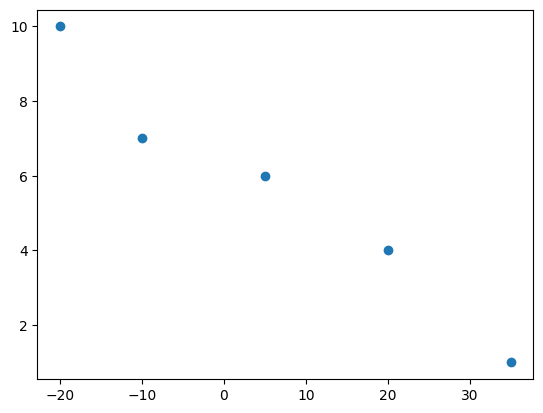

In [14]:
plt.scatter(X[:,0], X[:,1])

## 4. 피처 스케일링
- StandardScaler() 모듈을 사용


- ### 데이터 표준화 수식
$X - mean(X) / StdDev(X)$

- mean(X)는 X들의 평균을 의미한다. StdDev(X)는 X의 표준편차를 의미한다.
- 표준편차 수식 = 모든 X에 대해 X - mean(x)을 적용 -> 편차. 모든 편차를 제곱하여 표본수로 나눠준다. 그것이 분산, 분산에 루트를 씌우면 표준편차


In [9]:
# 데이터 표준화
scalerX = StandardScaler()
scalerX.fit(X)
X_std = scalerX.transform(X)
print(X_std)

[[-1.30986108  1.46341823]
 [-0.80606835  0.46563307]
 [-0.05037927  0.13303802]
 [ 0.70530981 -0.53215208]
 [ 1.46099889 -1.52993724]]


(-3.0, 3.0)

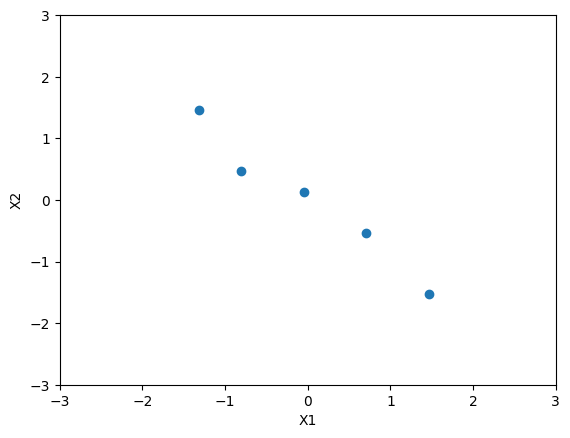

In [16]:
plt.scatter(X_std[:,0], X_std[:,1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(-3,3)
plt.ylim(-3,3)

In [24]:
print(np.mean(X_std, axis=0))

# 공분산행렬
print(np.cov(X_std[:,0], X_std[:,1], ddof = 0))

[-4.4408921e-17  8.8817842e-17]
[[ 1.         -0.98189555]
 [-0.98189555  1.        ]]


## 5. 주성분 분석
- PCA() 함수에 분석할 주성분 수를 성정한다.
- 기존 변수의 개수가 2이므로 2로 설정.

In [18]:
pca = PCA(n_components=2)
pca.fit(X_std)

PCA(n_components=2)

## 6. 주성분 추출 & 변환

In [21]:
# 주성분 분산
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

# 주성분 데이터 변환
Z = pca.fit_transform(X_std)
Z

[2.47736943 0.02263057]
[0.99094777 0.00905223]


array([[-1.96100461, -0.10858131],
       [-0.8992287 ,  0.2407241 ],
       [-0.12969561, -0.05844856],
       [ 0.8750177 , -0.122441  ],
       [ 2.11491122,  0.04874677]])

(-2.5, 2.5)

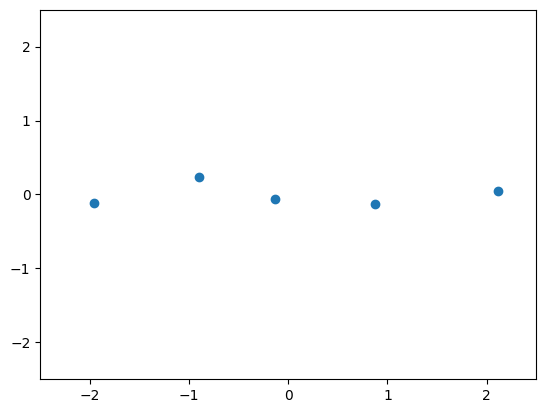

In [22]:
plt.scatter(Z[:,0], Z[:,1])
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)